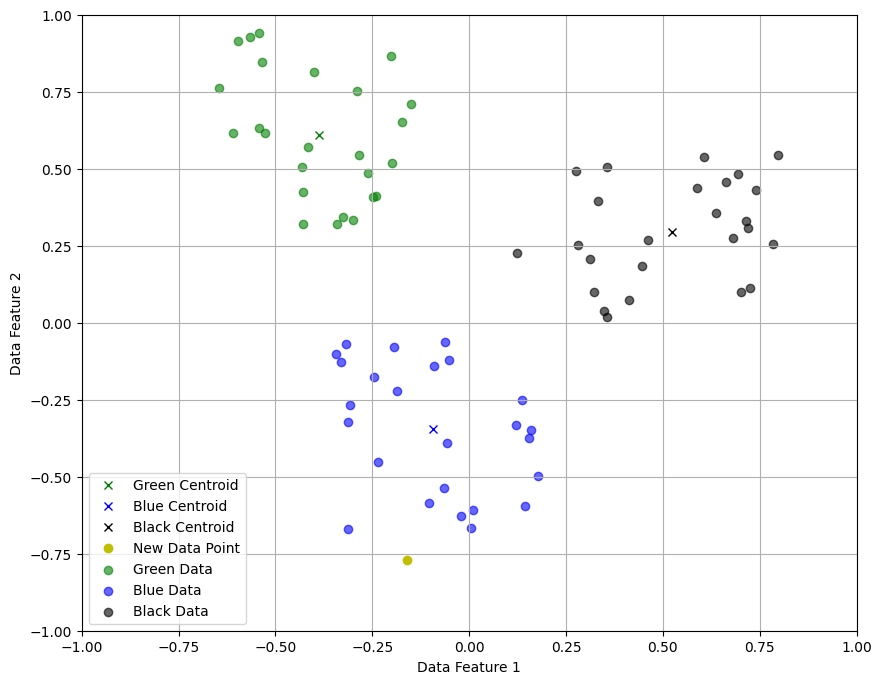

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Get the data from the .csv file
data = pd.read_csv('C:\\Users\\user\\Videos\\belajar\\qiskit2\\dataset\\kmeans_data.csv', usecols=['Feature 1', 'Feature 2', 'Class'])

# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

# Definisi variabel x dan y untuk masing-masing kelas
x_g = greenData['Feature 1']
y_g = greenData['Feature 2']

x_b = blueData['Feature 1']
y_b = blueData['Feature 2']

x_k = blackData['Feature 1']
y_k = blackData['Feature 2']

# This is the point we need to classify
y_p = [-0.77]
x_p = [-0.161]

# Finding the x-coords of the centroids
xgc = sum(x_g)/len(x_g)
xbc = sum(x_b)/len(x_b)
xkc = sum(x_k)/len(x_k)

# Finding the y-coords of the centroids
ygc = sum(y_g)/len(y_g)
ybc = sum(y_b)/len(y_b)
ykc = sum(y_k)/len(y_k)

# Plotting the centroids
plt.plot(xgc, ygc, 'gx', label='Green Centroid')
plt.plot(xbc, ybc, 'bx', label='Blue Centroid')
plt.plot(xkc, ykc, 'kx', label='Black Centroid')

# Plotting the new data point
plt.plot(x_p, y_p, 'yo', label='New Data Point')

# Plotting data points
plt.scatter(x_g, y_g, color='green', alpha=0.6, label='Green Data')
plt.scatter(x_b, y_b, color='blue', alpha=0.6, label='Blue Data')
plt.scatter(x_k, y_k, color='black', alpha=0.6, label='Black Data')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])
plt.legend()
plt.grid(True)
plt.show()


In [10]:
xgc,xbc,xkc,ygc,ybc,ykc

gc = [xgc, ygc]
bc = [xbc, ybc]
kc = [xkc, ykc]

gc,bc,kc


([-0.38716, 0.60956], [-0.0934, -0.34484000000000004], [0.5232, 0.29572])

In [2]:
from numpy import pi


# Calculating theta and phi values
phi_list = [((xi + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc] for xi in (x if isinstance(x, list) else [x])]
theta_list = [((xi + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc] for xi in (x if isinstance(x, list) else [x])]


def create_quantum_circuit(theta_list, phi_list, i):
    # Create Quantum and Classical Registers
    qreg = QuantumRegister(3, 'qreg')
    creg = ClassicalRegister(1, 'creg')
    qc = QuantumCircuit(qreg, creg, name='qc')

    # Function to replace u3 with rz and sx
    def apply_u3_equivalent(qc, theta, phi, qubit):
        qc.rz(phi, qubit)
        qc.sx(qubit)
        qc.rz(theta, qubit)
        qc.sx(qubit)

    # Apply a Hadamard to the ancillary
    qc.h(qreg[2])

    # Encode new point and centroid
    apply_u3_equivalent(qc, theta_list[0], phi_list[0], qreg[0])
    apply_u3_equivalent(qc, theta_list[i], phi_list[i], qreg[1])

    # Perform controlled swap
    qc.cswap(qreg[2], qreg[0], qreg[1])

    # Apply second Hadamard to ancillary
    qc.h(qreg[2])

    # Measure ancillary
    qc.measure(qreg[2], creg[0])
    
    return qc


from qiskit_aer import AerSimulator
from qiskit import transpile

def run_simulation(theta_list, phi_list):
    result_list = []
    
    for i in range(1, 4):
        qc = create_quantum_circuit(theta_list, phi_list, i)
        
        aer_sim = AerSimulator(seed_simulator=42)
        transpile_circuit = transpile(qc, aer_sim)
        job = aer_sim.run(transpile_circuit, shots=1024)
        
        result = job.result().get_counts()  # Hanya butuh ini
        
        print(result)  # Debugging untuk melihat hasil
        
        qc.draw(output='mpl', filename=f'circuit_{i}.png')

        
        result_list.append(result.get('1', 0))  # Pastikan '1' ada di hasil
    
    return result_list

        



In [3]:
results = run_simulation(theta_list, phi_list)
print(results)

NameError: name 'QuantumRegister' is not defined